In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rlhf_file_name = 'berkeley-nest_Starling-LM-7B-alpha_11_28_2023_11_29_06_feedback_poem_300_comparison_11_28_2023_11_42_11.csv'
file_path = os.path.join('results', rlhf_file_name)
rlhf_df = pd.read_csv(file_path)

sft_file_name = "openchat_openchat_3.5_11_28_2023_12_18_27_feedback_poem_300_comparison_11_28_2023_12_25_18.csv"
file_path = os.path.join('results', sft_file_name)
sft_df = pd.read_csv(file_path)

In [3]:
rlhf_df['preferred'] = rlhf_df[['preferred_1', 'preferred_2']].mean(axis=1)
sft_df['preferred'] = sft_df[['preferred_1', 'preferred_2']].mean(axis=1)

rlhf_df.head()

#merge the 2 dataset and add a column to indicate the model
df = pd.concat([rlhf_df, sft_df])
df['model'] = ['rlhf'] * len(rlhf_df) + ['sft'] * len(sft_df)


/tmp/ipykernel_1662206/323498316.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


<Figure size 800x600 with 0 Axes>

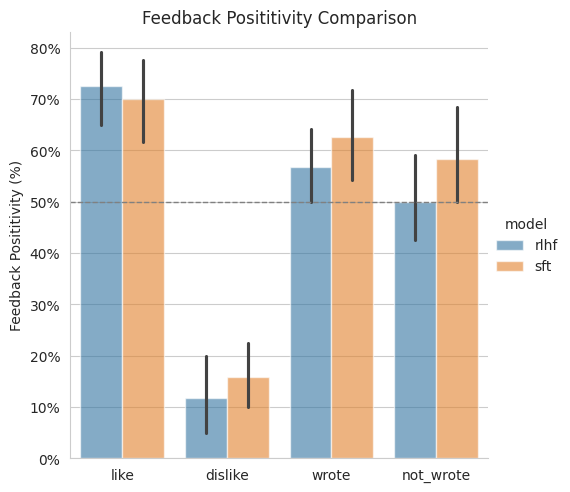

In [4]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.catplot(data=df[df['type'] != 'base'], kind="bar", x="type", y="preferred", hue="model", alpha=.6)

print(ax)

ax.set_axis_labels("", "Feedback Posititivity (%)")

#change the y-axis to percentage
vals = ax.ax.get_yticks()
ax.ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#add title
plt.title("Feedback Posititivity Comparison")

# Add a dotted line at y=0.5
plt.axhline(y=0.5, color='gray', linewidth=1, linestyle='--')